In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.optimize as opt

In [89]:
def loaddata(path):              #导入mat文件
    data=loadmat(path)
    return data

def plotdata(X,y):
    plt.scatter(X,y)
    plt.xlabel('Change in water level(X)')
    plt.ylabel('Water flowing out of the dam(y)')
    plt.show()
    
def h(theta,X):
    h=X@theta.reshape(2,1)
    return h

def costReg(theta,X,y,lamb):
    m=X.shape[0]
    cost=np.sum(np.power(h(theta,X)-y,2))/(2*m)
    reg=lamb*theta[1:]*theta[1:].T/(2*m)
    J=cost+reg
    return J

def gradientReg(theta,X,y,lamb):
    grad=np.zeros(theta.shape)
    m=X.shape[0]
    grad=X.T@(h(theta,X)-y)/m
    grad[1]=grad[1]+lamb*theta[1]/m
    return grad.flatten()

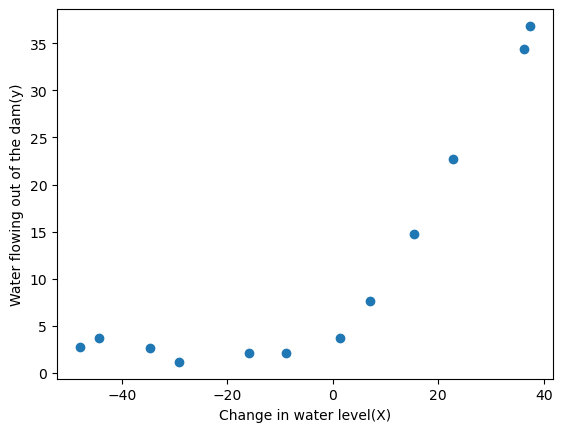

In [90]:
path='ex5data1.mat'
data=loaddata(path)
data
X=data['X']
y=data['y']
Xtest=data['Xtest']
ytest=data['ytest']
Xval=data['Xval']
yval=data['yval']

plotdata(X,y)

In [91]:
m=X.shape[0]
print(m)
X=np.insert(X,0,1,axis=1)
print(X)
print(X.shape,y.shape,Xval.shape,yval.shape,Xtest.shape,ytest.shape)

12
[[  1.         -15.93675813]
 [  1.         -29.15297922]
 [  1.          36.18954863]
 [  1.          37.49218733]
 [  1.         -48.05882945]
 [  1.          -8.94145794]
 [  1.          15.30779289]
 [  1.         -34.70626581]
 [  1.           1.38915437]
 [  1.         -44.38375985]
 [  1.           7.01350208]
 [  1.          22.76274892]]
(12, 2) (12, 1) (21, 1) (21, 1) (21, 1) (21, 1)


In [92]:
theta=np.array([1,1])
print(theta.shape)
print(theta)
print(theta.T.shape)
lamb=1

cost=costReg(theta,X,y,1)
cost
print(theta.shape)

(2,)
[1 1]
(2,)
(2,)


In [93]:
grad=gradientReg(theta,X,y,lamb)
grad

array([-15.30301567, 598.25074417])